Valor ótimo PCV = 440.938

 0   -->  10
10   -->   8
 8   -->  19
19   -->  17
17   -->   7
 7   -->  18
18   -->  14
14   -->  23
23   -->  20
20   -->   3
 3   -->   6
 6   -->  15
15   -->   4
 4   -->   1
 1   -->  11
11   -->  12
12   -->  13
13   -->   5
 5   -->  21
21   -->   9
 9   -->  16
16   -->   2
 2   -->  24
24   -->  22
22   -->   0


C:\Users\2840481821014\AppData\Local\Temp\ipykernel_3608\177667604.py:93: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


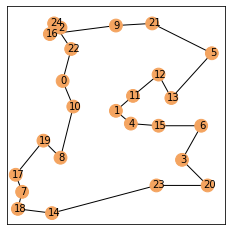

model('PCV') is not the default model.

In [1]:
from pymprog import*
from math import*
from random import*

# bibliotecas para desenhar
from matplotlib import pyplot as plt
import matplotlib.patches as patches

def distancia(i, j):
  return sqrt((j[0] - i[0])**2 + (j[1] - i[1])**2)


m = 100 # máximo das coordenadas

M = 25
coordenadas = []
for i in range(M):
  coordenadas.append([randint(0,m-5),randint(0,m-5)])




n = len(coordenadas)  # número de cidades (nós)
#print(n)
begin('PCV')

x = var('x',iprod(range(n),range(n)),bool)
u = var('u', n)
# função objetivo
minimize(sum(distancia(coordenadas[i],coordenadas[j]) * x[i,j] for i in range(n) for j in range(n) if i!=j))

# primeira restrição
for i in range(n):
  sum(x[i,j] for j in range(n) if i!=j) == 1

# segunda restrição
for j in range(n):
  sum(x[i,j] for i in range(n) if i!=j) == 1

# eliminação de sub-rotas
for i in range(n):
  for j in range(1,n):
    if i!=j:
      u[j] >= u[i] + n * x[i,j] - n + 1


# alguns parâmetros de resolução
solver(int,mip_gap=0.15)
solver(int,tm_lim=10*1000)
#solver(int,gmi_cuts=1)
solve()

print("Valor ótimo PCV = {:.3f}".format(vobj()))
print()

i = 0
j = 1
cont = 0
while cont < n:
  while x[i,j].primal < 0.9:
    j = j+1
  print("{:2d}   -->  {:2d}".format(i,j))
  i = j
  j = 0
  cont = cont + 1


# PLotar rota

fig1 = plt.figure()
ax1 = fig1.add_subplot(111, aspect='equal')
ax1.tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)
ax1.grid(False)

for i in range(n):
  for j in range(n):
    if i!=j:
      if x[i,j].primal>=0.9:
          ax1.add_patch(patches.ConnectionPatch(xyA=(coordenadas[i][0],coordenadas[i][1]), xyB=(coordenadas[j][0],coordenadas[j][1]), coordsA="data", coordsB="data",color='black'))


#ax1.add_patch(patches.Circle((coordenadas[0][0],coordenadas[0][1]), radius= 0.04*m, color = 'r'))
#plt.text(coordenadas[0][0]-0.02*m/2,coordenadas[0][1]-0.02*m/2, 'D', {'color': 'black', 'fontsize': 10})

for i in range(0,n):
    ax1.add_patch(patches.Circle((coordenadas[i][0],coordenadas[i][1]), radius= 0.03*m, color = '#F4A460'))
    plt.text(coordenadas[i][0]-len(str(i))*0.02*m/2,coordenadas[i][1]-0.02*m/2, str(i), {'color': 'black', 'fontsize': 10})


plt.ylim(-1,m+1)
plt.xlim(-1,m+1)

fig1.show()

plt.show(block=True)
plt.interactive(False)


end()